# Importing Libraries

In [370]:
# Library for reading mail and writing to csv
import unicodecsv as csv
import email
from bs4 import BeautifulSoup
from imap_tools import MailBox, AND, A
import re

import os
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
import pickle
import joblib 


# NLP LIBRARIES
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
import scrubadub as sb
#from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from nltk.stem import WordNetLemmatizer


# downloading stopwords corpus
nltk.download('stopwords')
#nltk.download('wordnet')
#stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline


#pip install xgboost
#!pip install spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mansurya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [371]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


In [372]:
#pip install imbalanced-learn!
#!pip install delayed 

In [373]:
# import imblearn
# from imblearn import under_sampling, over_sampling
# from imblearn.over_sampling import SMOTE

In [374]:
os.getcwd()

'E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Code'

# Readinng First time mail

In [375]:
inbox_AHAM = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_AHAM.csv",encoding="utf-8")
print("inbox_AHAM",len(inbox_AHAM))

inbox_ATTENDANCE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_ATTENDANCE.csv",encoding="utf-8")
print("inbox_ATTENDANCE",len(inbox_ATTENDANCE))

inbox_AUS_VISA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_AUS VISA.csv",encoding="utf-8")
print("inbox_AUS_VISA",len(inbox_AUS_VISA))

inbox_CENTOR = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_CENTOR.csv",encoding="utf-8")
print("inbox_CENTOR",len(inbox_CENTOR))

inbox_CLAIMS_REIMBURSEMENTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_CLAIMS REIMBURSEMENTS.csv",encoding="utf-8")
print("inbox_CLAIMS_REIMBURSEMENTS",len(inbox_CLAIMS_REIMBURSEMENTS))

inbox_DOCUMENTS_LETTERS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_DOCUMENTS&LETTERS.csv",encoding="utf-8")
print("inbox_DOCUMENTS_LETTERS",len(inbox_DOCUMENTS_LETTERS))

inbox_EMPLOYEE_DATA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_EMPLOYEE DATA.csv",encoding="utf-8")
print("inbox_EMPLOYEE_DATA",len(inbox_EMPLOYEE_DATA))

inbox_HRD = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_HRD.csv",encoding="utf-8")
print("inbox_HRD",len(inbox_HRD))

inbox_INCREMENTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INCREMENTS.csv",encoding="utf-8")
print("inbox_INCREMENTS",len(inbox_INCREMENTS))

inbox_INDUCTION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INDUCTION.csv",encoding="utf-8")
print("inbox_INDUCTION",len(inbox_INDUCTION))

inbox_INFRA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INFRA.csv",encoding="utf-8")
print("inbox_INFRA",len(inbox_INFRA))

inbox_INSURANCE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INSURANCE.csv",encoding="utf-8")
print("inbox_INSURANCE",len(inbox_INSURANCE))

inbox_INVOICES = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INVOICES.csv",encoding="utf-8")
print("inbox_INVOICES",len(inbox_INVOICES))

inbox_IT_ONBOARDING_FORM = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_IT ONBOARDING FORM.csv",encoding="utf-8")
print("inbox_IT_ONBOARDING_FORM",len(inbox_IT_ONBOARDING_FORM))

inbox_LEAVE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_LEAVE.csv",encoding="utf-8")
print("inbox_LEAVE",len(inbox_LEAVE))

inbox_OTHERS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_OTHERS.csv",encoding="utf-8")
print("inbox_OTHERS",len(inbox_OTHERS))

inbox_OVERDUE_RECEIVABLES = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_OVERDUE-RECEIVABLES.csv",encoding="utf-8")
print("inbox_OVERDUE_RECEIVABLES",len(inbox_OVERDUE_RECEIVABLES))

inbox_PROJECTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_PROJECTS.csv",encoding="utf-8")
print("inbox_PROJECTS",len(inbox_PROJECTS))

inbox_RECRUITMENT = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RECRUITMENT.csv",encoding="utf-8")
print("inbox_RECRUITMENT",len(inbox_RECRUITMENT))

inbox_RESIGNATION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RESIGNATION.csv",encoding="utf-8")
print("inbox_RESIGNATION",len(inbox_RESIGNATION))

inbox_REWARDS_RECOGNITION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_REWARDS_RECOGNITION.csv",encoding="utf-8")
print("inbox_REWARDS_RECOGNITION",len(inbox_REWARDS_RECOGNITION))

inbox_RSU = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RSU.csv",encoding="utf-8")
print("inbox_RSU",len(inbox_RSU))

inbox_SALARY = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_SALARY.csv",encoding="utf-8")
print("inbox_SALARY",len(inbox_SALARY))

inbox_TRAINING_DEVELOPMENT = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_TRAINING_DEVELOPMENT.csv",encoding="utf-8")
print("inbox_TRAINING_DEVELOPMENT",len(inbox_TRAINING_DEVELOPMENT))

inbox_UTILIZATION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_UTILIZATION.csv",encoding="utf-8")
print("inbox_UTILIZATION",len(inbox_UTILIZATION))



inbox_AHAM 1
inbox_ATTENDANCE 20
inbox_AUS_VISA 5
inbox_CENTOR 10
inbox_CLAIMS_REIMBURSEMENTS 109
inbox_DOCUMENTS_LETTERS 1
inbox_EMPLOYEE_DATA 21
inbox_HRD 3
inbox_INCREMENTS 21
inbox_INDUCTION 5
inbox_INFRA 10
inbox_INSURANCE 3
inbox_INVOICES 3
inbox_IT_ONBOARDING_FORM 38
inbox_LEAVE 12
inbox_OTHERS 11
inbox_OVERDUE_RECEIVABLES 0
inbox_PROJECTS 8
inbox_RECRUITMENT 286
inbox_RESIGNATION 1
inbox_REWARDS_RECOGNITION 2
inbox_RSU 5
inbox_SALARY 7
inbox_TRAINING_DEVELOPMENT 1
inbox_UTILIZATION 1


# Readinng Reply mail

In [376]:
inbox_AHAM_RE = pandas.read_csv(r"E:\EmailTriage\EmailTriage_C_Operatn_5-5-21\Data_reply\inbox_AHAM_RE.csv",encoding="utf-8")
inbox_AHAM_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_AHAM",len(inbox_AHAM_RE))

inbox_ATTENDANCE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_ATTENDANCE_RE.csv",encoding="utf-8")
inbox_ATTENDANCE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_ATTENDANCE",len(inbox_ATTENDANCE_RE))

inbox_AUS_VISA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_AUS_VISA_RE.csv",encoding="utf-8")
inbox_AUS_VISA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_AUS_VISA",len(inbox_AUS_VISA_RE))

inbox_CENTOR_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_CENTOR_RE.csv",encoding="utf-8")
inbox_CENTOR_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_CENTOR",len(inbox_CENTOR_RE))

inbox_CLAIMS_REIMBURSEMENTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_CLAIMS_REIMBURSEMENTS_RE.csv",encoding="utf-8")
inbox_CLAIMS_REIMBURSEMENTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_CLAIMS_REIMBURSEMENTS",len(inbox_CLAIMS_REIMBURSEMENTS_RE))

inbox_DOCUMENTS_LETTERS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_DOCUMENTS_LETTERS_RE.csv",encoding="utf-8")
inbox_DOCUMENTS_LETTERS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_DOCUMENTS_LETTERS",len(inbox_DOCUMENTS_LETTERS_RE))

inbox_EMPLOYEE_DATA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_EMPLOYEE_DATA_RE.csv",encoding="utf-8")
inbox_EMPLOYEE_DATA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_EMPLOYEE_DATA",len(inbox_EMPLOYEE_DATA_RE))

inbox_HRD_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_HRD_RE.csv",encoding="utf-8")
inbox_HRD_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_HRD",len(inbox_HRD_RE))

inbox_INCREMENTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INCREMENTS_RE.csv",encoding="utf-8")
inbox_INCREMENTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INCREMENTS",len(inbox_INCREMENTS_RE))

inbox_INDUCTION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INDUCTION_RE.csv",encoding="utf-8")
inbox_INDUCTION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INDUCTION",len(inbox_INDUCTION_RE))

inbox_INFRA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INFRA_RE.csv",encoding="utf-8")
inbox_INFRA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INFRA",len(inbox_INFRA_RE))

inbox_INSURANCE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INSURANCE_RE.csv",encoding="utf-8")
inbox_INSURANCE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INSURANCE",len(inbox_INSURANCE_RE))

inbox_INVOICES_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INVOICES_RE.csv",encoding="utf-8")
inbox_INVOICES_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INVOICES",len(inbox_INVOICES_RE))

inbox_IT_ONBOARDING_FORM_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_IT_ONBOARDING_FORM_RE.csv",encoding="utf-8")
inbox_IT_ONBOARDING_FORM_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_IT_ONBOARDING_FORM",len(inbox_IT_ONBOARDING_FORM_RE))

inbox_LEAVE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_LEAVE_RE.csv",encoding="utf-8")
inbox_LEAVE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_LEAVE",len(inbox_LEAVE_RE))

inbox_OTHERS_RE = pandas.read_csv(r"E://EmailTriage//EmailTriage_C_Operatn_5-5-21//Data_reply/inbox_OTHERS_RE.csv",encoding="utf-8")
inbox_OTHERS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_OTHERS",len(inbox_OTHERS_RE))

inbox_OVERDUE_RECEIVABLES_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_OVERDUE_RECEIVABLES_RE.csv",encoding="utf-8")
inbox_OVERDUE_RECEIVABLES_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_OVERDUE_RECEIVABLES",len(inbox_OVERDUE_RECEIVABLES_RE))

inbox_PROJECTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_PROJECTS_RE.csv",encoding="utf-8")
inbox_PROJECTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_PROJECTS",len(inbox_PROJECTS_RE))

inbox_RECRUITMENT_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RECRUITMENT_RE.csv",encoding="utf-8")
inbox_RECRUITMENT_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RECRUITMENT",len(inbox_RECRUITMENT_RE))

inbox_RESIGNATION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RESIGNATION_RE.csv",encoding="utf-8")
inbox_RESIGNATION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RESIGNATION",len(inbox_RESIGNATION_RE))

inbox_REWARDS_RECOGNITION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_REWARDS_RECOGNITION_RE.csv",encoding="utf-8")
inbox_REWARDS_RECOGNITION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_REWARDS_RECOGNITION",len(inbox_REWARDS_RECOGNITION_RE))

inbox_RSU_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RSU_RE.csv",encoding="utf-8")
inbox_RSU_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RSU",len(inbox_RSU_RE))

inbox_SALARY_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_SALARY_RE.csv",encoding="utf-8")
inbox_SALARY_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_SALARY",len(inbox_SALARY_RE))

inbox_TRAINING_DEVELOPMENT_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_TRAINING_DEVELOPMENT_RE.csv",encoding="utf-8")
inbox_TRAINING_DEVELOPMENT_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_TRAINING_DEVELOPMENT",len(inbox_TRAINING_DEVELOPMENT_RE))

inbox_UTILIZATION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_UTILIZATION_RE.csv",encoding="utf-8")
inbox_UTILIZATION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_UTILIZATION",len(inbox_UTILIZATION_RE))



inbox_AHAM 3
inbox_ATTENDANCE 155
inbox_AUS_VISA 18
inbox_CENTOR 18
inbox_CLAIMS_REIMBURSEMENTS 51
inbox_DOCUMENTS_LETTERS 5
inbox_EMPLOYEE_DATA 77
inbox_HRD 8
inbox_INCREMENTS 6
inbox_INDUCTION 8
inbox_INFRA 63
inbox_INSURANCE 7
inbox_INVOICES 11
inbox_IT_ONBOARDING_FORM 9
inbox_LEAVE 16
inbox_OTHERS 22
inbox_OVERDUE_RECEIVABLES 4
inbox_PROJECTS 17
inbox_RECRUITMENT 307
inbox_RESIGNATION 8
inbox_REWARDS_RECOGNITION 28
inbox_RSU 14
inbox_SALARY 19
inbox_TRAINING_DEVELOPMENT 4
inbox_UTILIZATION 9


In [377]:
# [inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,inbox_RECRUITMENT ,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ]


# #inbox_ATTENDANCE.shape

# Part-5

In [378]:
inbox_RECRUITMENT_RE = inbox_RECRUITMENT_RE.replace(['NAR'],'RTT')
inbox_RECRUITMENT_RE

,email,category
0,"Hi Pragati,\nThanks for reaching us\n😊.\nWe ar...",RTT
1,"Hi ,\nIncluding Operations & Harish and adding...",RTT
2,"﻿Dear Mr Mathew Thomas,\nI have marked my Plac...",RTT
3,"Hi Ann,\nPFB draft.\nLet’s welcome Harish Jadh...",RTT
4,"Hi Team,\n",RTT
...,...,...
321,"Hi Ajith,\nThanks for your acceptance.\n",RTT
322,"\nHello Padmasree,\nI will be joining other or...",RTT
323,"Dear Sijo,\nPlease find the attached offer let...",RTT
324,"\nDear Sir,\n",RTT


# Dropping duplicate row

In [379]:
#df_AR.drop_duplicates(subset=['email'], keep="first",inplace = True)
inbox_ATTENDANCE.head()

,email,category
0,"Hi, I have not taken any leaves this month. Pl...",NAR
1,"Hi , Please find the attendance for Sep20: Hol...",NAR
2,"Dear Team, Please cancel my attendance of belo...",NAR
3,Reminder on the Leave data which needs to be c...,NAR
4,"Hi Sandeep, Komal, Ashwini and me will be work...",NAR


# Part-1

# Mergeing both data frame and building final dataframe

In [380]:
trainDF = pandas.concat([inbox_AHAM,
                         inbox_ATTENDANCE,inbox_ATTENDANCE_RE,
                         inbox_AUS_VISA ,inbox_CENTOR ,
                         inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE,
                         inbox_DOCUMENTS_LETTERS ,
                         inbox_EMPLOYEE_DATA ,inbox_EMPLOYEE_DATA_RE,
                         inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
                         inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [381]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [382]:
trainDF.tail(5)

,email,category
1169,"Dear Sijo,\nPlease find the attached offer let...",RTT
1170,"Hi Team, I have completed my salesforce certif...",NAR
1171,Please process. Approved by Prabhash\n,NAR
1172,"Dear Venkat, Congratulations!! On behalf of Ce...",RTT
1173,"\nI accept the offer.\nOn Fri, 23 Apr 2021 at ...",RTT


In [383]:
#print("\n","df_AR_Shape",df_AR.shape,"\n","df_NAR_Shape",df_NAR.shape,"\n","df_RE_FW_NAR",df_RE_FW_NAR.shape,"\n","df_email",trainDF.shape)

In [384]:
trainDF.isna().sum()

email       15
category     0
dtype: int64

In [385]:
trainDF.dropna(inplace=True)

In [386]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [387]:
trainDF["category"].value_counts()

RTT    590
NAR    569
Name: category, dtype: int64

In [388]:
trainDF.shape

(1159, 2)

In [389]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [390]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [391]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [392]:
trainDF.head()

,email,category
0,hi team disappointing given waited well recall...,RTT
1,hi mathew received annie's laptop booked couri...,NAR
2,hi srividyaplease find attached documentsdo le...,NAR
3,dear remya greetings excited onboard 12th apr ...,RTT
4,hi shivakumar ambadgatti ann john attached inv...,NAR


In [393]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.30)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [394]:
train_x

154     hi judegood noonas per process follow pls shar...
127     hi anjanihope goodrequest share acknowledgment...
964                                      hii accept offer
762     hi padmasreeplease find attached requested doc...
1058    hello team able check checkbox rsu acknowledge...
                              ...                        
252     hi manojthanks support opportunities offering ...
148     welcome mrinmoyour ops team mostly based india...
121     hi chinmayplease find attached documents reque...
671                                              approved
53      hi atul srifor information candidate sheetal r...
Name: email, Length: 811, dtype: object

In [395]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(811,)
(348,)
(811,)
(348,)


In [396]:
valid_y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,

# NAR-0 | RTT-1

In [397]:
checking=encoder.inverse_transform(valid_y)
checking

array(['NAR', 'RTT', 'NAR', 'NAR', 'NAR', 'NAR', 'RTT', 'NAR', 'RTT',
       'RTT', 'NAR', 'NAR', 'RTT', 'NAR', 'NAR', 'NAR', 'NAR', 'RTT',
       'NAR', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'NAR', 'NAR', 'RTT',
       'RTT', 'NAR', 'NAR', 'NAR', 'RTT', 'RTT', 'RTT', 'NAR', 'RTT',
       'RTT', 'RTT', 'NAR', 'NAR', 'RTT', 'RTT', 'RTT', 'RTT', 'NAR',
       'RTT', 'NAR', 'NAR', 'RTT', 'RTT', 'NAR', 'RTT', 'NAR', 'NAR',
       'NAR', 'NAR', 'RTT', 'NAR', 'RTT', 'NAR', 'RTT', 'RTT', 'RTT',
       'NAR', 'RTT', 'RTT', 'RTT', 'NAR', 'RTT', 'RTT', 'NAR', 'RTT',
       'RTT', 'RTT', 'RTT', 'NAR', 'RTT', 'NAR', 'NAR', 'NAR', 'NAR',
       'RTT', 'NAR', 'RTT', 'NAR', 'RTT', 'NAR', 'RTT', 'RTT', 'RTT',
       'RTT', 'NAR', 'NAR', 'RTT', 'NAR', 'RTT', 'NAR', 'NAR', 'NAR',
       'RTT', 'RTT', 'RTT', 'RTT', 'NAR', 'NAR', 'RTT', 'NAR', 'RTT',
       'NAR', 'RTT', 'RTT', 'NAR', 'NAR', 'RTT', 'NAR', 'NAR', 'RTT',
       'RTT', 'RTT', 'NAR', 'RTT', 'NAR', 'NAR', 'RTT', 'RTT', 'RTT',
       'NAR', 'NAR',

In [398]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [399]:
# print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
# print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
# #print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
# #print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
# #print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
# print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# # print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# # print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# # print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

In [400]:
print(xtrain_count)

  (0, 1064)	1
  (0, 1683)	1
  (0, 1707)	1
  (0, 1884)	1
  (0, 1978)	1
  (0, 2259)	1
  (0, 2489)	1
  (0, 2785)	1
  (0, 2808)	1
  (0, 2979)	1
  (0, 3073)	1
  (0, 3391)	1
  (0, 3430)	1
  (0, 3435)	1
  (0, 3483)	1
  (0, 3651)	1
  (0, 3714)	1
  (0, 3816)	1
  (0, 3819)	1
  (0, 3976)	1
  (0, 4014)	1
  (0, 4329)	1
  (0, 4401)	1
  (0, 4568)	1
  (0, 4632)	1
  :	:
  (808, 3129)	1
  (808, 3790)	1
  (808, 3852)	1
  (808, 4088)	1
  (808, 4295)	1
  (808, 4339)	1
  (808, 4537)	1
  (809, 1066)	1
  (810, 152)	1
  (810, 294)	1
  (810, 1071)	1
  (810, 1146)	1
  (810, 1420)	2
  (810, 1612)	1
  (810, 1641)	1
  (810, 2357)	1
  (810, 2489)	1
  (810, 2522)	1
  (810, 2627)	1
  (810, 2628)	1
  (810, 2858)	1
  (810, 3707)	1
  (810, 4114)	1
  (810, 4340)	1
  (810, 4512)	1


In [401]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(811, 5183)
(348, 5183)


In [402]:
# # print("Before OverSampling, counts of label '1': {}".format(sum(train_y == 1)))
# # print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y == 0)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y = sm.fit_resample(xtrain_count, train_y)
  
# # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# # print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
# # print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [403]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
# sm = SMOTE(random_state = 2)
# xtrain_tfidf, train_y_tfidf = sm.fit_resample(xtrain_tfidf, train_y)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
# sm = SMOTE(random_state = 2)
# xtrain_tfidf_ngram, train_y_tfidf_ngram = sm.fit_resample(xtrain_tfidf_ngram, train_y)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 
# sm = SMOTE(random_state = 2)
# xtrain_tfidf_ngram_chars, train_y_ngram_char = sm.fit_resample(xtrain_tfidf_ngram_chars, train_y)

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


# Dumping the transformer

In [404]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/part5_trans_rec_rep/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/part5_trans_rec_rep/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/part5_trans_rec_rep/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/part5_trans_rec_rep/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


# Transformer loading method

In [405]:
# count_vect_trans_ = joblib.load('ml_model_pkl/part1_trans_rec/count_vect_trans.sav')

# wl_tfidf_trans_ = joblib.load('ml_model_pkl/part1_trans_rec/wl_tfidf_trans.sav')

# ngl_tfidf_trans_ = joblib.load('ml_model_pkl/part1_trans_rec/ngl_tfidf_trans.sav')

# cl_tfidf_trans_ = joblib.load('ml_model_pkl/part1_trans_rec/cl_tfidf_trans.sav')


In [406]:
# # load the pre-trained word-embedding vectors 
# # For DL model only
# embeddings_index = {}
# for i, line in enumerate(open('data/wiki-news-300d-1M.vec',encoding= "utf-8",errors="ignore")):
#     values = line.split()
#     embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

In [407]:
#trainDF.head()
# data/glove.6B.100d.txt',encoding= "utf-8"
# data/wiki-news-300d-1M.vec'


In [408]:
# #For DL model only
# # create a tokenizer 
# token = text.Tokenizer()
# token.fit_on_texts(trainDF['email'])
# word_index = token.word_index

# # convert text to sequence of tokens and pad them to ensure equal length vectors 
# train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
# valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# # create token-embedding mapping
# embedding_matrix = numpy.zeros((len(word_index) + 1, 300)) #100
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         #
#         #print("running or not")
#         embedding_matrix[i] = embedding_vector

In [409]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [410]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

# Latent Dirichlet Allocation

In [411]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [412]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/part5_model_rec_rep/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(train_y,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [413]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    
    X_labels = ['NAR',"RTT"] # NAR-0 | RTT-1
    Y_labels = ["NAR","RTT"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

# Naive Bayes

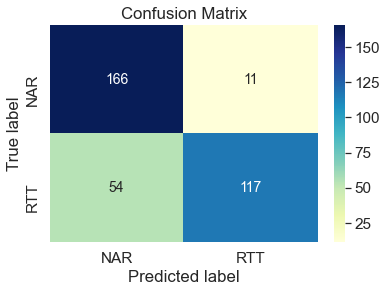

NB, Count Vectors: 
Accuracy on training data 89.03 %
Accuracy on testing data 81.32000000000001 %
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       177
           1       0.91      0.68      0.78       171

    accuracy                           0.81       348
   macro avg       0.83      0.81      0.81       348
weighted avg       0.83      0.81      0.81       348

**************************************** End of first model ****************************************


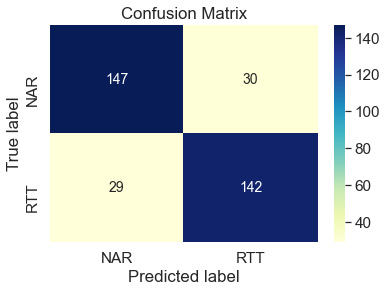

NB, WordLevel TF-IDF: 
Accuracy on training data 94.19999999999999 %
Accuracy on testing data 83.05 %
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       177
           1       0.83      0.83      0.83       171

    accuracy                           0.83       348
   macro avg       0.83      0.83      0.83       348
weighted avg       0.83      0.83      0.83       348

**************************************** End of first model ****************************************


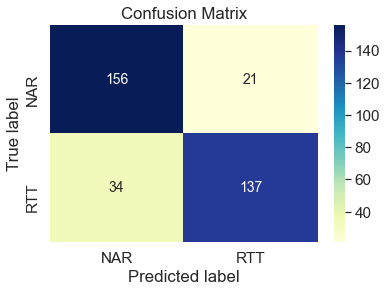

NB, N-Gram Vectors: 
Accuracy on training data 89.4 %
Accuracy on testing data 84.2 %
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       177
           1       0.87      0.80      0.83       171

    accuracy                           0.84       348
   macro avg       0.84      0.84      0.84       348
weighted avg       0.84      0.84      0.84       348

**************************************** End of first model ****************************************


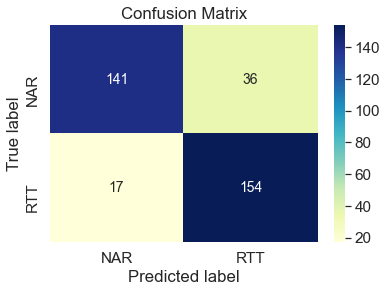

NB, CharLevel Vectors: 
Accuracy on training data 87.92 %
Accuracy on testing data 84.77 %
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       177
           1       0.81      0.90      0.85       171

    accuracy                           0.85       348
   macro avg       0.85      0.85      0.85       348
weighted avg       0.85      0.85      0.85       348

**************************************** End of first model ****************************************


In [414]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier

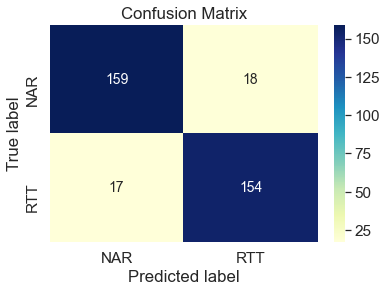

LR, Count Vectors: 
Accuracy on training data 99.00999999999999 %
Accuracy on testing data 89.94 %
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       177
           1       0.90      0.90      0.90       171

    accuracy                           0.90       348
   macro avg       0.90      0.90      0.90       348
weighted avg       0.90      0.90      0.90       348

**************************************** End of first model ****************************************


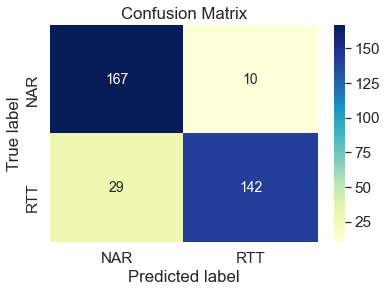

LR, WordLevel TF-IDF: 
Accuracy on training data 96.55 %
Accuracy on testing data 88.79 %
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       177
           1       0.93      0.83      0.88       171

    accuracy                           0.89       348
   macro avg       0.89      0.89      0.89       348
weighted avg       0.89      0.89      0.89       348

**************************************** End of first model ****************************************


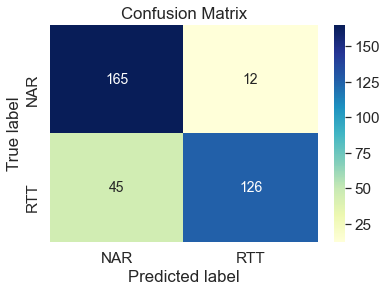

LR, N-Gram Vectors: 
Accuracy on training data 91.36999999999999 %
Accuracy on testing data 83.62 %
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       177
           1       0.91      0.74      0.82       171

    accuracy                           0.84       348
   macro avg       0.85      0.83      0.83       348
weighted avg       0.85      0.84      0.83       348

**************************************** End of first model ****************************************


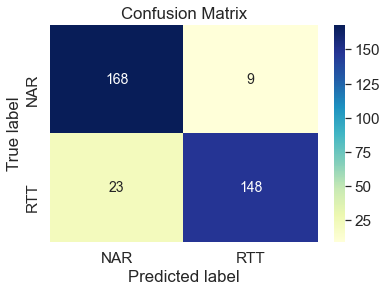

LR, CharLevel Vectors: 
Accuracy on training data 93.46 %
Accuracy on testing data 90.8 %
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       177
           1       0.94      0.87      0.90       171

    accuracy                           0.91       348
   macro avg       0.91      0.91      0.91       348
weighted avg       0.91      0.91      0.91       348

**************************************** End of first model ****************************************


In [415]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# SVM Model

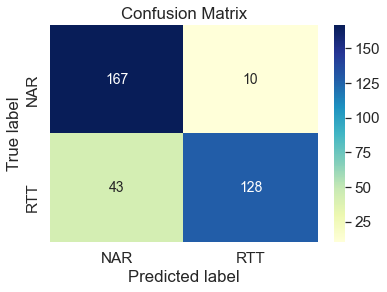

SVM, N-Gram Vectors:
Accuracy on training data 84.77 %
Accuracy on testing data 94.20500000000001 %
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       177
           1       0.93      0.75      0.83       171

    accuracy                           0.85       348
   macro avg       0.86      0.85      0.85       348
weighted avg       0.86      0.85      0.85       348

**************************************** End of first model ****************************************


In [416]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Bagging Model

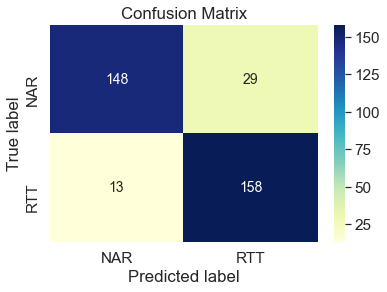

RF, Count Vectors: 
Accuracy on training data 99.753 %
Accuracy on testing data 87.92999999999999 %
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       177
           1       0.84      0.92      0.88       171

    accuracy                           0.88       348
   macro avg       0.88      0.88      0.88       348
weighted avg       0.88      0.88      0.88       348

**************************************** End of first model ****************************************


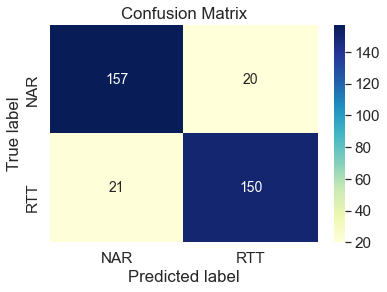

RF, WordLevel TF-IDF: 
Accuracy on training data 99.753 %
Accuracy on testing data 88.22 %
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       177
           1       0.88      0.88      0.88       171

    accuracy                           0.88       348
   macro avg       0.88      0.88      0.88       348
weighted avg       0.88      0.88      0.88       348

**************************************** End of first model ****************************************


In [417]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Boosting Model

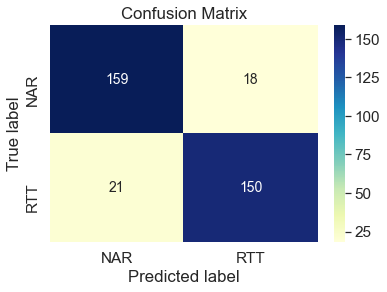

Xgb, Count Vectors: 
Accuracy on training data 98.03 %
Accuracy on testing data 88.79 %
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       177
           1       0.89      0.88      0.88       171

    accuracy                           0.89       348
   macro avg       0.89      0.89      0.89       348
weighted avg       0.89      0.89      0.89       348

**************************************** End of first model ****************************************


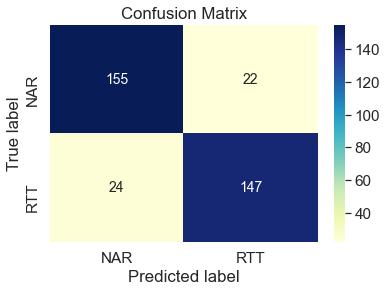

Xgb, WordLevel TF-IDF: 
Accuracy on training data 98.89 %
Accuracy on testing data 86.78 %
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       177
           1       0.87      0.86      0.86       171

    accuracy                           0.87       348
   macro avg       0.87      0.87      0.87       348
weighted avg       0.87      0.87      0.87       348

**************************************** End of first model ****************************************


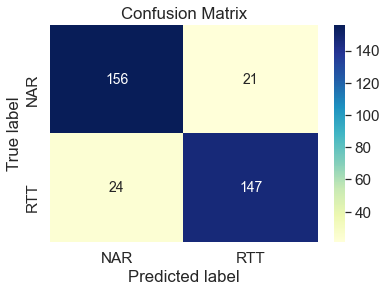

Xgb, CharLevel Vectors: 
Accuracy on training data 99.63 %
Accuracy on testing data 87.07000000000001 %
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       177
           1       0.88      0.86      0.87       171

    accuracy                           0.87       348
   macro avg       0.87      0.87      0.87       348
weighted avg       0.87      0.87      0.87       348

**************************************** End of first model ****************************************


In [418]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-6 | Attendance Vs All

In [419]:
inbox_ATTENDANCE_FIRST_RE = pandas.concat([inbox_ATTENDANCE,inbox_ATTENDANCE_RE],axis=0)

inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_ATTENDANCE_FIRST_RE.isna().sum()
inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.replace(['NAR'],'ATT')
inbox_ATTENDANCE_FIRST_RE

,email,category
0,"Hi,\nBelow are my details.\nType\nNo of days\n...",ATT
1,"Hi Team,\nFind details below\nType\nNo of days...",ATT
2,"Hi,\nI would like to update some of my Centelo...",ATT
3,"Hi,\nNo leaves taken. No extra hours.\n",ATT
4,No leaves\n,ATT
...,...,...
170,"Hi Team,\nNo leaves in September 2020.\n",ATT
171,"Hi Team,\nPlease find the details below:-\nTyp...",ATT
172,"Hi Team,\nFind my details below -\nType\nNo of...",ATT
173,"None\nSent via the Samsung Galaxy Note8, an AT...",ATT


In [420]:
trainDF = pandas.concat([inbox_AHAM,
                         inbox_ATTENDANCE_FIRST_RE,
                         inbox_AUS_VISA ,inbox_CENTOR ,
                         inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE,
                         inbox_DOCUMENTS_LETTERS ,
                         inbox_EMPLOYEE_DATA ,inbox_EMPLOYEE_DATA_RE,
                         inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
                         inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [421]:
# # First time mail only | excluding recruitmnet folder as it has more number of mails
# trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE_FIRST_RE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [422]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [423]:
trainDF = trainDF.replace(['RTT'],'NAR')

In [424]:
trainDF.tail(5)

,email,category
1169,"Hi Sri,\nPFA\n",NAR
1170,"Hi team, I have logged into Centor Web applica...",NAR
1171,"Dear AKANA TARUN SAIRAM, Congratulations!! On ...",NAR
1172,"Dear Vivek, Greetings !!! Kindly find attached...",NAR
1173,"Hello, I'm not having leave balance in my cent...",NAR


In [425]:
trainDF["category"].value_counts()

NAR    999
ATT    175
Name: category, dtype: int64

In [426]:
trainDF.isna().sum()

email       15
category     0
dtype: int64

In [427]:
trainDF.shape

(1174, 2)

In [428]:
trainDF.dropna(inplace=True)

In [429]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [430]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [431]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [432]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.20)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [433]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(927,)
(232,)
(927,)
(232,)


In [434]:
valid_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [435]:
checking=encoder.inverse_transform(valid_y)
checking

array(['NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'ATT', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'ATT',
       'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR',
       'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'ATT',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'ATT', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'ATT', 'NAR',
       'NAR', 'ATT', 'NAR', 'ATT', 'ATT', 'ATT', 'ATT', 'NAR', 'NAR',
       'NAR', 'NAR',

# ATT-0 | NAR -1

In [436]:
# create a count vectorizer object 
count_vect_att = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect_att.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect_att.transform(train_x)
xvalid_count =  count_vect_att.transform(valid_x)

In [437]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(927, 5183)
(232, 5183)


# Up sampling for Attendence

In [438]:
# print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
# print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
# # #print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
# # #print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
# # #print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # # # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # # # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
# print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# # # print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# # # print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# # # print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

In [439]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [440]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/part6_trans_att_rep/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/part6_trans_att_rep/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/part6_trans_att_rep/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/part6_trans_att_rep/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [441]:
count_vect_trans_ = joblib.load('ml_model_pkl/part2_trans_att/count_vect_trans.sav')

wl_tfidf_trans_ = joblib.load('ml_model_pkl/part2_trans_att/wl_tfidf_trans.sav')

ngl_tfidf_trans_ = joblib.load('ml_model_pkl/part2_trans_att/ngl_tfidf_trans.sav')

cl_tfidf_trans_ = joblib.load('ml_model_pkl/part2_trans_att/cl_tfidf_trans.sav')  #part2_model_att


In [442]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [443]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [444]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [445]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/part6_model_att_rep/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(label,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [446]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    
    X_labels = ['ATT',"NAR"] #ATT-0 | NAR -1
    Y_labels = ["ATT","NAR"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

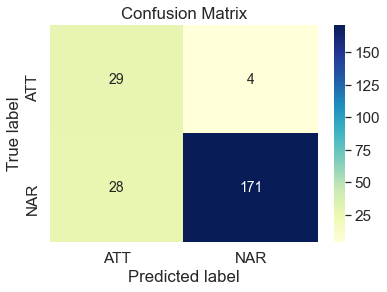

NB, Count Vectors: 
Accuracy on training data 96.00999999999999 %
Accuracy on testing data 86.21 %
              precision    recall  f1-score   support

           0       0.51      0.88      0.64        33
           1       0.98      0.86      0.91       199

    accuracy                           0.86       232
   macro avg       0.74      0.87      0.78       232
weighted avg       0.91      0.86      0.88       232

**************************************** End of first model ****************************************


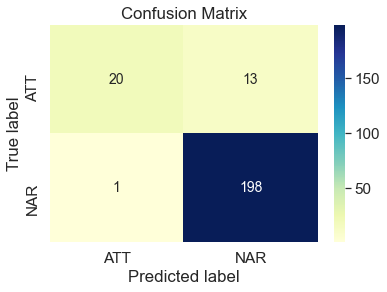

NB, WordLevel TF-IDF: 
Accuracy on training data 94.93 %
Accuracy on testing data 93.97 %
              precision    recall  f1-score   support

           0       0.95      0.61      0.74        33
           1       0.94      0.99      0.97       199

    accuracy                           0.94       232
   macro avg       0.95      0.80      0.85       232
weighted avg       0.94      0.94      0.93       232

**************************************** End of first model ****************************************


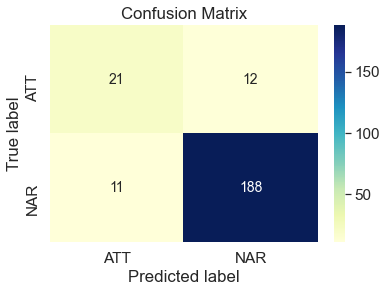

NB, N-Gram Vectors: 
Accuracy on training data 93.74 %
Accuracy on testing data 90.09 %
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.94      0.94      0.94       199

    accuracy                           0.90       232
   macro avg       0.80      0.79      0.79       232
weighted avg       0.90      0.90      0.90       232

**************************************** End of first model ****************************************


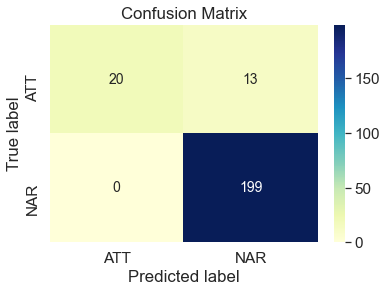

NB, CharLevel Vectors: 
Accuracy on training data 93.74 %
Accuracy on testing data 94.39999999999999 %
              precision    recall  f1-score   support

           0       1.00      0.61      0.75        33
           1       0.94      1.00      0.97       199

    accuracy                           0.94       232
   macro avg       0.97      0.80      0.86       232
weighted avg       0.95      0.94      0.94       232

**************************************** End of first model ****************************************


In [447]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


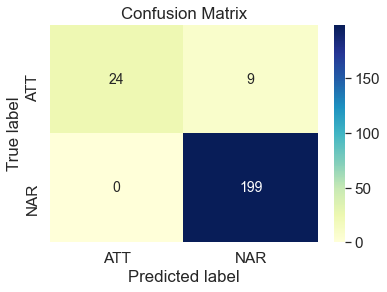

LR, Count Vectors: 
Accuracy on training data 99.24 %
Accuracy on testing data 96.12 %
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        33
           1       0.96      1.00      0.98       199

    accuracy                           0.96       232
   macro avg       0.98      0.86      0.91       232
weighted avg       0.96      0.96      0.96       232

**************************************** End of first model ****************************************


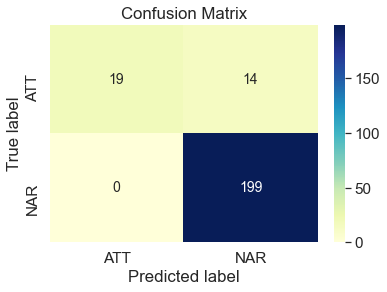

LR, WordLevel TF-IDF: 
Accuracy on training data 94.61 %
Accuracy on testing data 93.97 %
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.93      1.00      0.97       199

    accuracy                           0.94       232
   macro avg       0.97      0.79      0.85       232
weighted avg       0.94      0.94      0.93       232

**************************************** End of first model ****************************************


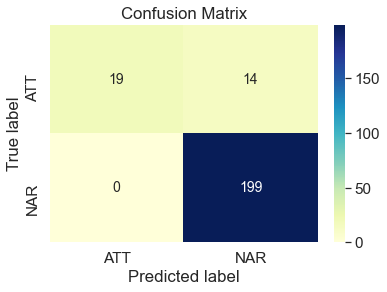

LR, N-Gram Vectors: 
Accuracy on training data 92.56 %
Accuracy on testing data 93.97 %
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.93      1.00      0.97       199

    accuracy                           0.94       232
   macro avg       0.97      0.79      0.85       232
weighted avg       0.94      0.94      0.93       232

**************************************** End of first model ****************************************


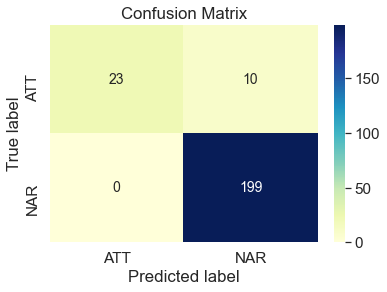

LR, CharLevel Vectors: 
Accuracy on training data 95.15 %
Accuracy on testing data 95.69 %
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        33
           1       0.95      1.00      0.98       199

    accuracy                           0.96       232
   macro avg       0.98      0.85      0.90       232
weighted avg       0.96      0.96      0.95       232

**************************************** End of first model ****************************************


In [448]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


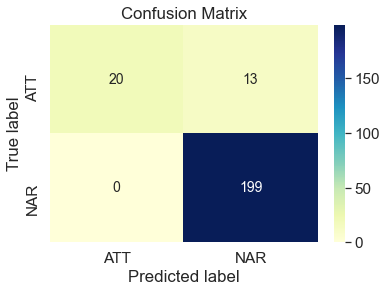

SVM, N-Gram Vectors:
Accuracy on training data 94.39999999999999 %
Accuracy on testing data 98.274 %
              precision    recall  f1-score   support

           0       1.00      0.61      0.75        33
           1       0.94      1.00      0.97       199

    accuracy                           0.94       232
   macro avg       0.97      0.80      0.86       232
weighted avg       0.95      0.94      0.94       232

**************************************** End of first model ****************************************


In [449]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


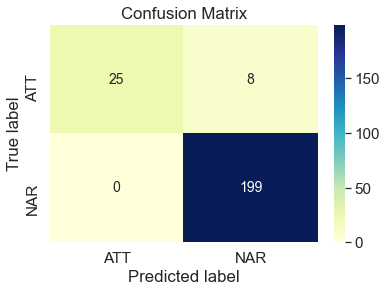

RF, Count Vectors: 
Accuracy on training data 99.78399999999999 %
Accuracy on testing data 96.55 %
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        33
           1       0.96      1.00      0.98       199

    accuracy                           0.97       232
   macro avg       0.98      0.88      0.92       232
weighted avg       0.97      0.97      0.96       232

**************************************** End of first model ****************************************


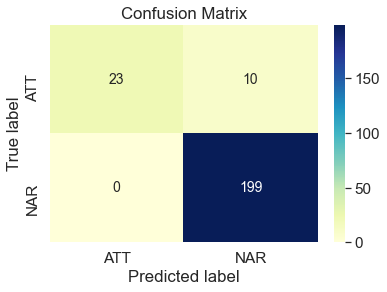

RF, WordLevel TF-IDF: 
Accuracy on training data 99.78399999999999 %
Accuracy on testing data 95.69 %
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        33
           1       0.95      1.00      0.98       199

    accuracy                           0.96       232
   macro avg       0.98      0.85      0.90       232
weighted avg       0.96      0.96      0.95       232

**************************************** End of first model ****************************************


In [450]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


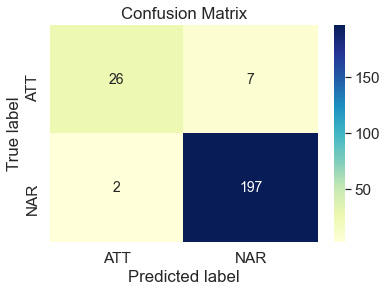

Xgb, Count Vectors: 
Accuracy on training data 98.27 %
Accuracy on testing data 96.12 %
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.97      0.99      0.98       199

    accuracy                           0.96       232
   macro avg       0.95      0.89      0.92       232
weighted avg       0.96      0.96      0.96       232

**************************************** End of first model ****************************************


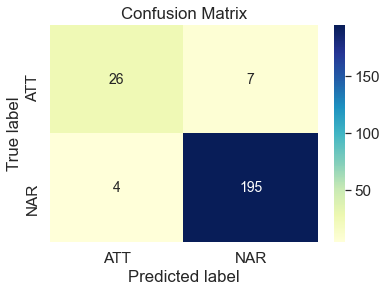

Xgb, WordLevel TF-IDF: 
Accuracy on training data 99.46000000000001 %
Accuracy on testing data 95.26 %
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.97      0.98      0.97       199

    accuracy                           0.95       232
   macro avg       0.92      0.88      0.90       232
weighted avg       0.95      0.95      0.95       232

**************************************** End of first model ****************************************


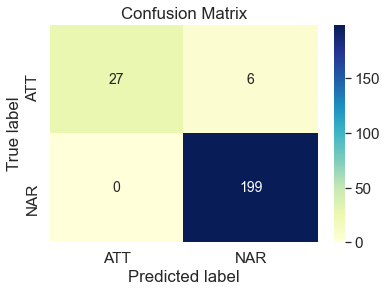

Xgb, CharLevel Vectors: 
Accuracy on training data 99.78 %
Accuracy on testing data 97.41 %
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.97      1.00      0.99       199

    accuracy                           0.97       232
   macro avg       0.99      0.91      0.94       232
weighted avg       0.97      0.97      0.97       232

**************************************** End of first model ****************************************


In [451]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-7| CLAIMS-REIMBURSMENTS Vs All

In [452]:
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = pandas.concat([inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE],axis=0)

inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.isna().sum()
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.replace(['NAR'],'CLM')
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE

,email,category
0,"Morning Mathew Sir, Please find the reimbursem...",CLM
1,"Hello Team, Please find attached reimbursement...",CLM
2,NaN,CLM
3,"Hi Team,\nI had paid Rs. 4000 for cab from Mum...",CLM
4,"Hi Ann, Please find the receipt for the busine...",CLM
...,...,...
155,"Hi Niranjan, Ann, Have submitted an expense v...",CLM
156,"Hello Srividya, I am requesting reimbursement ...",CLM
157,"Hi, Kindly check the mail for attached reimbur...",CLM
158,"Hello Team, Pls find attached bills and reimbu...",CLM


In [453]:
trainDF = pandas.concat([inbox_AHAM,
                         inbox_ATTENDANCE_FIRST_RE,
                         inbox_AUS_VISA ,inbox_CENTOR ,
                         inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE,
                         inbox_DOCUMENTS_LETTERS ,
                         inbox_EMPLOYEE_DATA ,inbox_EMPLOYEE_DATA_RE,
                         inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
                         inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [454]:
# # First time mail only | excluding recruitmnet folder as it has more number of mails
# trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [455]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [456]:
trainDF = trainDF.replace(['RTT',"ATT"],'NAR')

In [457]:
trainDF.tail(5)

,email,category
1169,"\nHello Divya,\nI am accepting the offer. Will...",NAR
1170,Hi Chinmay\nPFA contract letter of Anuj signe...,NAR
1171,"Hello Team, Good Noon. Request you to find att...",CLM
1172,"Dear Nikhil, Greetings! We are excited to have...",NAR
1173,"\nHi All,\n",NAR


In [458]:
trainDF["category"].value_counts()

NAR    1014
CLM     160
Name: category, dtype: int64

In [459]:
trainDF.isna().sum()

email       15
category     0
dtype: int64

In [460]:
trainDF.dropna(inplace=True)

In [461]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [462]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [463]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [464]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [465]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.30)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [466]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(811,)
(348,)
(811,)
(348,)


In [467]:
valid_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [468]:
checking=encoder.inverse_transform(valid_y)
checking

array(['NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'CLM',
       'NAR', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'CLM', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'CLM', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM',
       'NAR', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'CLM', 'NAR', 'CLM', 'NAR', 'NAR', 'CLM', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'CLM', 'CLM', 'NAR',
       'NAR', 'NAR', 'CLM', 'NAR', 'CLM', 'CLM', 'NAR', 'NAR', 'NAR',
       'CLM', 'NAR',

# CLM-0 | NAR -1

In [469]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [470]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(811, 5183)
(348, 5183)


# Up Sampling for Claim Data

In [471]:
# print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
# print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
# # #print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
# # #print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
# # #print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # # # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # # # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
# print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# # # print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# # # print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# # # print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

In [472]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [473]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/part7_trans_clm_rep/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/part7_trans_clm_rep/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/part7_trans_clm_rep/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/part7_trans_clm_rep/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [474]:
# count_vect_trans_ = joblib.load('ml_model_pkl/part3_trans_clm/count_vect_trans.sav')

# wl_tfidf_trans_ = joblib.load('ml_model_pkl/part3_trans_clm/wl_tfidf_trans.sav')

# ngl_tfidf_trans_ = joblib.load('ml_model_pkl/part3_trans_clm/ngl_tfidf_trans.sav')

# cl_tfidf_trans_ = joblib.load('ml_model_pkl/part3_trans_clm/cl_tfidf_trans.sav')  #part3_model_clm


In [475]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [476]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [477]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [478]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/part7_model_clm_rep/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(label,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [479]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    # CLM -0 | NAR -1
    X_labels = ["CLM","NAR"] #0|1
    Y_labels = ["CLM","NAR"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,,xticklabels=X_labels,xticklabels=X_labels
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

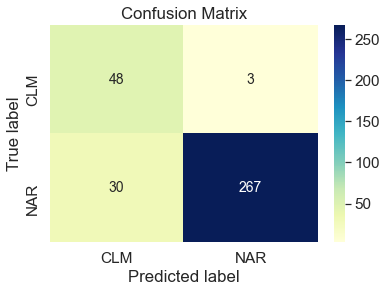

NB, Count Vectors: 
Accuracy on training data 95.56 %
Accuracy on testing data 90.52 %
              precision    recall  f1-score   support

           0       0.62      0.94      0.74        51
           1       0.99      0.90      0.94       297

    accuracy                           0.91       348
   macro avg       0.80      0.92      0.84       348
weighted avg       0.93      0.91      0.91       348

**************************************** End of first model ****************************************


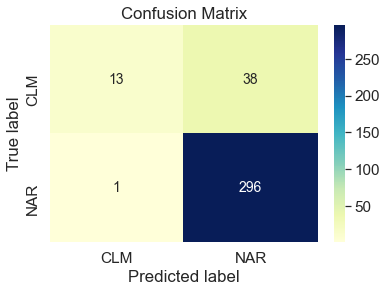

NB, WordLevel TF-IDF: 
Accuracy on training data 91.99000000000001 %
Accuracy on testing data 88.79 %
              precision    recall  f1-score   support

           0       0.93      0.25      0.40        51
           1       0.89      1.00      0.94       297

    accuracy                           0.89       348
   macro avg       0.91      0.63      0.67       348
weighted avg       0.89      0.89      0.86       348

**************************************** End of first model ****************************************


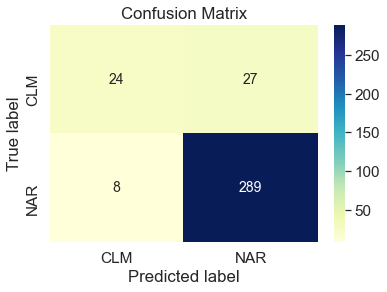

NB, N-Gram Vectors: 
Accuracy on training data 92.60000000000001 %
Accuracy on testing data 89.94 %
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        51
           1       0.91      0.97      0.94       297

    accuracy                           0.90       348
   macro avg       0.83      0.72      0.76       348
weighted avg       0.89      0.90      0.89       348

**************************************** End of first model ****************************************


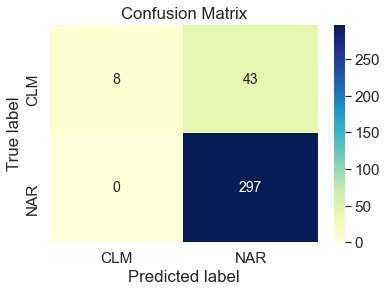

NB, CharLevel Vectors: 
Accuracy on training data 89.03 %
Accuracy on testing data 87.64 %
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        51
           1       0.87      1.00      0.93       297

    accuracy                           0.88       348
   macro avg       0.94      0.58      0.60       348
weighted avg       0.89      0.88      0.84       348

**************************************** End of first model ****************************************


In [480]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


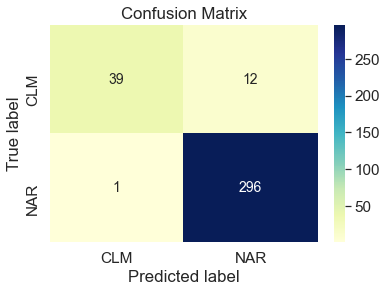

LR, Count Vectors: 
Accuracy on training data 98.52 %
Accuracy on testing data 96.26 %
              precision    recall  f1-score   support

           0       0.97      0.76      0.86        51
           1       0.96      1.00      0.98       297

    accuracy                           0.96       348
   macro avg       0.97      0.88      0.92       348
weighted avg       0.96      0.96      0.96       348

**************************************** End of first model ****************************************


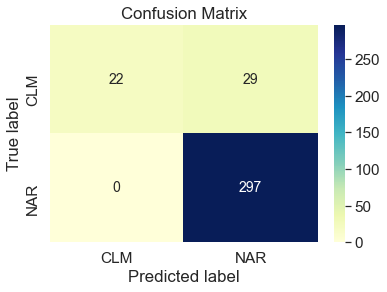

LR, WordLevel TF-IDF: 
Accuracy on training data 93.22 %
Accuracy on testing data 91.67 %
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        51
           1       0.91      1.00      0.95       297

    accuracy                           0.92       348
   macro avg       0.96      0.72      0.78       348
weighted avg       0.92      0.92      0.90       348

**************************************** End of first model ****************************************


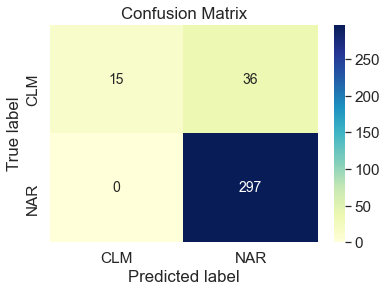

LR, N-Gram Vectors: 
Accuracy on training data 90.63 %
Accuracy on testing data 89.66 %
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        51
           1       0.89      1.00      0.94       297

    accuracy                           0.90       348
   macro avg       0.95      0.65      0.70       348
weighted avg       0.91      0.90      0.87       348

**************************************** End of first model ****************************************


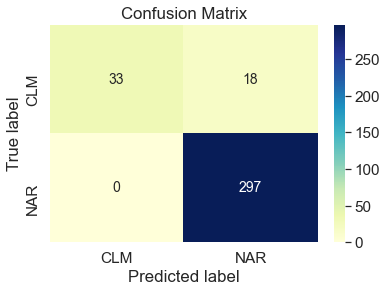

LR, CharLevel Vectors: 
Accuracy on training data 93.96 %
Accuracy on testing data 94.83 %
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        51
           1       0.94      1.00      0.97       297

    accuracy                           0.95       348
   macro avg       0.97      0.82      0.88       348
weighted avg       0.95      0.95      0.94       348

**************************************** End of first model ****************************************


In [481]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


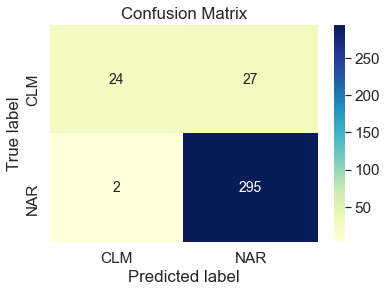

SVM, N-Gram Vectors:
Accuracy on training data 91.67 %
Accuracy on testing data 97.287 %
              precision    recall  f1-score   support

           0       0.92      0.47      0.62        51
           1       0.92      0.99      0.95       297

    accuracy                           0.92       348
   macro avg       0.92      0.73      0.79       348
weighted avg       0.92      0.92      0.90       348

**************************************** End of first model ****************************************


In [482]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


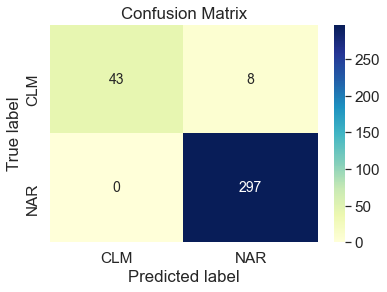

RF, Count Vectors: 
Accuracy on training data 99.753 %
Accuracy on testing data 97.7 %
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        51
           1       0.97      1.00      0.99       297

    accuracy                           0.98       348
   macro avg       0.99      0.92      0.95       348
weighted avg       0.98      0.98      0.98       348

**************************************** End of first model ****************************************


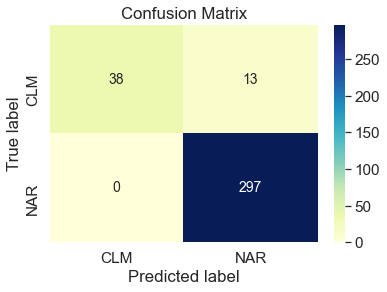

RF, WordLevel TF-IDF: 
Accuracy on training data 99.753 %
Accuracy on testing data 96.26 %
              precision    recall  f1-score   support

           0       1.00      0.75      0.85        51
           1       0.96      1.00      0.98       297

    accuracy                           0.96       348
   macro avg       0.98      0.87      0.92       348
weighted avg       0.96      0.96      0.96       348

**************************************** End of first model ****************************************


In [483]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


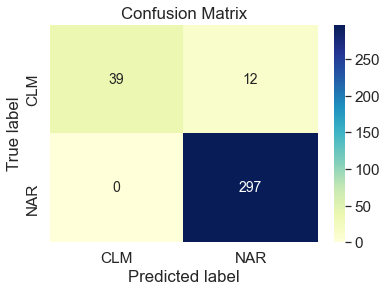

Xgb, Count Vectors: 
Accuracy on training data 98.03 %
Accuracy on testing data 96.55 %
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        51
           1       0.96      1.00      0.98       297

    accuracy                           0.97       348
   macro avg       0.98      0.88      0.92       348
weighted avg       0.97      0.97      0.96       348

**************************************** End of first model ****************************************


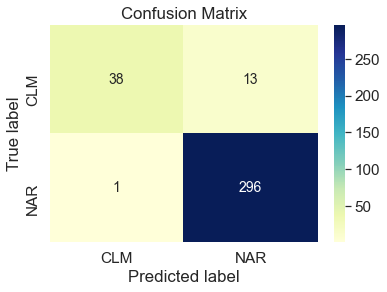

Xgb, WordLevel TF-IDF: 
Accuracy on training data 98.64 %
Accuracy on testing data 95.98 %
              precision    recall  f1-score   support

           0       0.97      0.75      0.84        51
           1       0.96      1.00      0.98       297

    accuracy                           0.96       348
   macro avg       0.97      0.87      0.91       348
weighted avg       0.96      0.96      0.96       348

**************************************** End of first model ****************************************


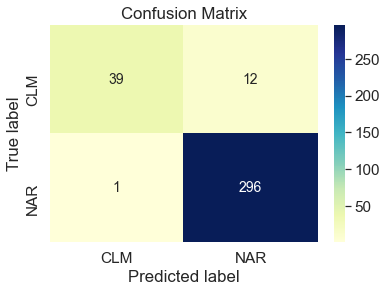

Xgb, CharLevel Vectors: 
Accuracy on training data 99.75 %
Accuracy on testing data 96.26 %
              precision    recall  f1-score   support

           0       0.97      0.76      0.86        51
           1       0.96      1.00      0.98       297

    accuracy                           0.96       348
   macro avg       0.97      0.88      0.92       348
weighted avg       0.96      0.96      0.96       348

**************************************** End of first model ****************************************


In [484]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-8 EMPLOYEE DATA Vs All

In [485]:
inbox_EMPLOYEE_DATA_FIRST_RE = pandas.concat([inbox_EMPLOYEE_DATA,inbox_EMPLOYEE_DATA_RE],axis=0)

inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_EMPLOYEE_DATA_FIRST_RE.isna().sum()
inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.replace(['NAR'],'EMP')
inbox_EMPLOYEE_DATA_FIRST_RE

,email,category
0,"\nGreetings for the day!\nDear Sir/Ma'am,\nI h...",EMP
1,Personal DetailsFirst Name - SnigdhaLast Name ...,EMP
2,"Hi Team, I have opened my Super Account. Pleas...",EMP
3,"Hi Sanket,\nThanks for your mail.\nWe need all...",EMP
4,"Hi Team,\nPlease find the details\nContact num...",EMP
...,...,...
93,"\nHello Divya,\nPlease find attached documents...",EMP
94,"\nHi Srividya and Divya ,\nI am also excited t...",EMP
95,"\nMa'am,\nI was asked to submit the following ...",EMP
96,"Hi Centelon Operation Team,\n",EMP


In [486]:
trainDF = pandas.concat([inbox_AHAM,
                         inbox_ATTENDANCE_FIRST_RE,
                         inbox_AUS_VISA ,inbox_CENTOR ,
                         inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE,
                         inbox_DOCUMENTS_LETTERS ,
                         inbox_EMPLOYEE_DATA_FIRST_RE,
                         inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,
                         inbox_RECRUITMENT ,inbox_RECRUITMENT_RE,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [487]:
# # First time mail only | excluding recruitmnet folder as it has more number of mails
# trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA_FIRST_RE ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [488]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [489]:
trainDF = trainDF.replace(['RTT',"ATT","CLM"],'NAR')

In [490]:
trainDF["category"].value_counts()

NAR    1076
EMP      98
Name: category, dtype: int64

In [491]:
trainDF.isna().sum()

email       15
category     0
dtype: int64

In [492]:
trainDF.dropna(inplace=True)

In [493]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [494]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [495]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [496]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [497]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.20)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [498]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)


(927,)
(232,)
(927,)
(232,)


In [499]:
valid_y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [500]:
checking=encoder.inverse_transform(valid_y)
checking

array(['NAR', 'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'NAR', 'NAR',
       'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'EMP',
       'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR',

# EMP-0 | NAR-1

In [501]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [502]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(927, 5183)
(232, 5183)


# Up sampling for Empployee Data

In [503]:
# print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
# print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
# # #print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
# # #print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
# # #print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # # # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # # # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
# print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
# print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# # # print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# # # print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# # # print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

In [504]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=4800)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4800)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [505]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/part8_trans_emp_rep/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/part8_trans_emp_rep/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/part8_trans_emp_rep/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/part8_trans_emp_rep/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [506]:
# count_vect_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/count_vect_trans.sav')

# wl_tfidf_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/wl_tfidf_trans.sav')

# ngl_tfidf_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/ngl_tfidf_trans.sav')

# cl_tfidf_trans_ = joblib.load('ml_model_pkl/part4_trans_emp/cl_tfidf_trans.sav')


In [507]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [508]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [509]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [510]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/part8_model_emp_rep/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(label,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [511]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
     # EMP -0 | NAR -1
    X_labels = ['EMP',"NAR"]
    Y_labels = ["EMP","NAR"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

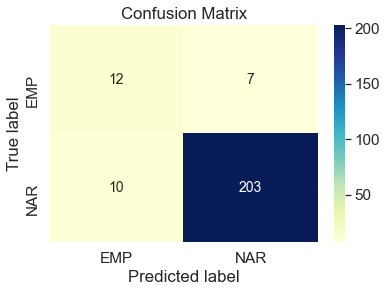

NB, Count Vectors: 
Accuracy on training data 95.89999999999999 %
Accuracy on testing data 92.67 %
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        19
           1       0.97      0.95      0.96       213

    accuracy                           0.93       232
   macro avg       0.76      0.79      0.77       232
weighted avg       0.93      0.93      0.93       232

**************************************** End of first model ****************************************


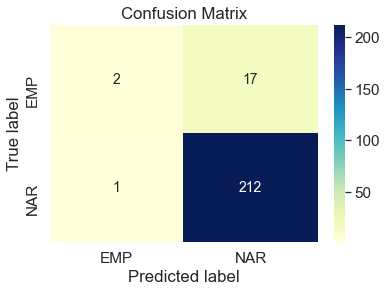

NB, WordLevel TF-IDF: 
Accuracy on training data 93.74 %
Accuracy on testing data 92.24 %
              precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.93      1.00      0.96       213

    accuracy                           0.92       232
   macro avg       0.80      0.55      0.57       232
weighted avg       0.90      0.92      0.90       232

**************************************** End of first model ****************************************


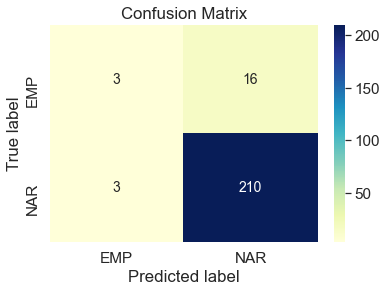

NB, N-Gram Vectors: 
Accuracy on training data 92.45 %
Accuracy on testing data 91.81 %
              precision    recall  f1-score   support

           0       0.50      0.16      0.24        19
           1       0.93      0.99      0.96       213

    accuracy                           0.92       232
   macro avg       0.71      0.57      0.60       232
weighted avg       0.89      0.92      0.90       232

**************************************** End of first model ****************************************


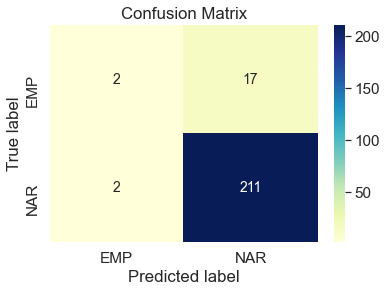

NB, CharLevel Vectors: 
Accuracy on training data 92.77 %
Accuracy on testing data 91.81 %
              precision    recall  f1-score   support

           0       0.50      0.11      0.17        19
           1       0.93      0.99      0.96       213

    accuracy                           0.92       232
   macro avg       0.71      0.55      0.57       232
weighted avg       0.89      0.92      0.89       232

**************************************** End of first model ****************************************


In [512]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


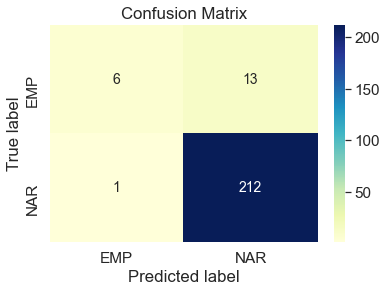

LR, Count Vectors: 
Accuracy on training data 98.81 %
Accuracy on testing data 93.97 %
              precision    recall  f1-score   support

           0       0.86      0.32      0.46        19
           1       0.94      1.00      0.97       213

    accuracy                           0.94       232
   macro avg       0.90      0.66      0.71       232
weighted avg       0.94      0.94      0.93       232

**************************************** End of first model ****************************************


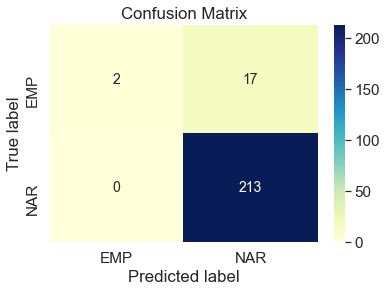

LR, WordLevel TF-IDF: 
Accuracy on training data 92.88 %
Accuracy on testing data 92.67 %
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.93      1.00      0.96       213

    accuracy                           0.93       232
   macro avg       0.96      0.55      0.58       232
weighted avg       0.93      0.93      0.90       232

**************************************** End of first model ****************************************


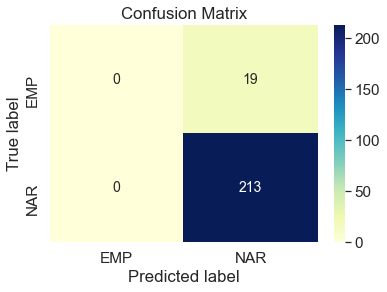

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR, N-Gram Vectors: 
Accuracy on training data 92.02 %
Accuracy on testing data 91.81 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.92      1.00      0.96       213

    accuracy                           0.92       232
   macro avg       0.46      0.50      0.48       232
weighted avg       0.84      0.92      0.88       232

**************************************** End of first model ****************************************


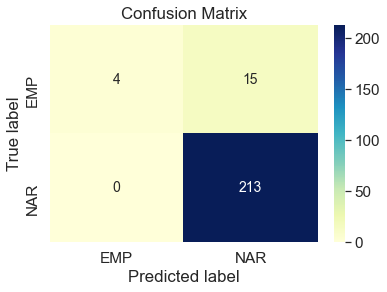

LR, CharLevel Vectors: 
Accuracy on training data 93.74 %
Accuracy on testing data 93.53 %
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.93      1.00      0.97       213

    accuracy                           0.94       232
   macro avg       0.97      0.61      0.66       232
weighted avg       0.94      0.94      0.92       232

**************************************** End of first model ****************************************


In [513]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


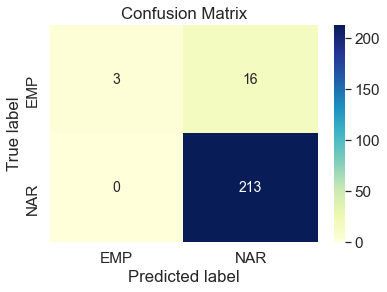

SVM, N-Gram Vectors:
Accuracy on training data 93.10000000000001 %
Accuracy on testing data 96.98 %
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        19
           1       0.93      1.00      0.96       213

    accuracy                           0.93       232
   macro avg       0.97      0.58      0.62       232
weighted avg       0.94      0.93      0.91       232

**************************************** End of first model ****************************************


In [514]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


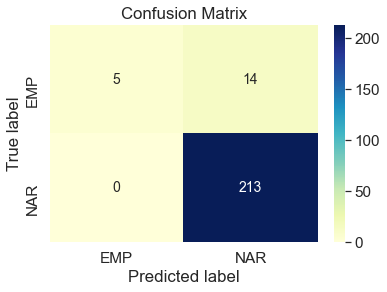

RF, Count Vectors: 
Accuracy on training data 99.892 %
Accuracy on testing data 93.97 %
              precision    recall  f1-score   support

           0       1.00      0.26      0.42        19
           1       0.94      1.00      0.97       213

    accuracy                           0.94       232
   macro avg       0.97      0.63      0.69       232
weighted avg       0.94      0.94      0.92       232

**************************************** End of first model ****************************************


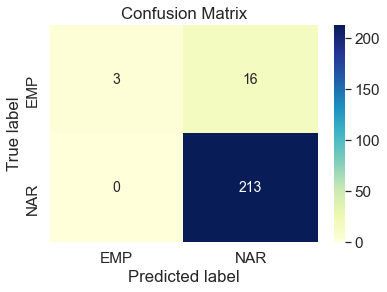

RF, WordLevel TF-IDF: 
Accuracy on training data 99.892 %
Accuracy on testing data 93.10000000000001 %
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        19
           1       0.93      1.00      0.96       213

    accuracy                           0.93       232
   macro avg       0.97      0.58      0.62       232
weighted avg       0.94      0.93      0.91       232

**************************************** End of first model ****************************************


In [515]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


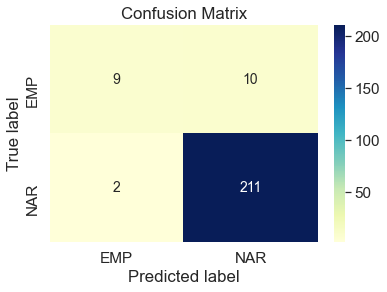

Xgb, Count Vectors: 
Accuracy on training data 98.71 %
Accuracy on testing data 94.83 %
              precision    recall  f1-score   support

           0       0.82      0.47      0.60        19
           1       0.95      0.99      0.97       213

    accuracy                           0.95       232
   macro avg       0.89      0.73      0.79       232
weighted avg       0.94      0.95      0.94       232

**************************************** End of first model ****************************************


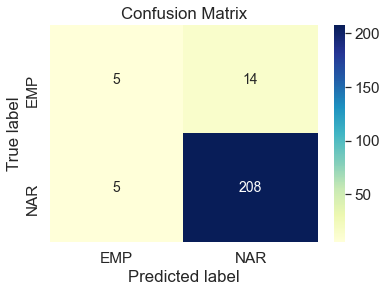

Xgb, WordLevel TF-IDF: 
Accuracy on training data 99.57000000000001 %
Accuracy on testing data 91.81 %
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        19
           1       0.94      0.98      0.96       213

    accuracy                           0.92       232
   macro avg       0.72      0.62      0.65       232
weighted avg       0.90      0.92      0.91       232

**************************************** End of first model ****************************************


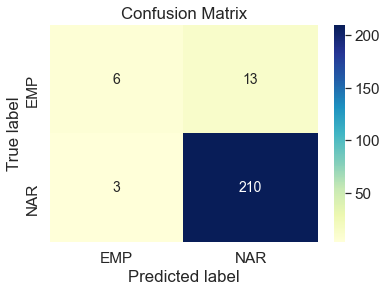

Xgb, CharLevel Vectors: 
Accuracy on training data 99.89 %
Accuracy on testing data 93.10000000000001 %
              precision    recall  f1-score   support

           0       0.67      0.32      0.43        19
           1       0.94      0.99      0.96       213

    accuracy                           0.93       232
   macro avg       0.80      0.65      0.70       232
weighted avg       0.92      0.93      0.92       232

**************************************** End of first model ****************************************


In [516]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)
